In [1]:
import pymongo
from pymongo import MongoClient

In [2]:
client = MongoClient('localhost', 27017)

In [3]:
db = client.smartshark_test

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib notebook

In [5]:
plt.style.use('seaborn-darkgrid')

In [6]:
CollectionFrame = pd.DataFrame()

In [7]:
for name in db.collection_names():
    CollectionFrame[name] = {db[name].count():name}

In [8]:
CollectionFrame

,vcs_system,issue_system,code_entity_state,code_group_state,event,file,issue,project,commit,issue_comment,tag,hunk,file_action,plugin_schema,people,mailing_list,message,clone_instance
1,1,1,16094002,96033,27034,3528,2720,1,2371,27143,71,51795,16445,6,4585,4,67337,1469717


# Look at the files

In [25]:
files = pd.DataFrame(list(db.file.find()))

In [26]:
files.head()

,_id,path,vcs_system_id
0,5853eb373ee1b95d618826f2,CHANGES.txt,5853eb4aa737aab0c0c42518
1,5853eb373ee1b95d628826f5,NOTICE.txt,5853eb4aa737aab0c0c42518
2,5853eb373ee1b95d768826f2,.gitignore,5853eb4aa737aab0c0c42518
3,5853eb433ee1b95d848828c6,.gitattributes,5853eb4aa737aab0c0c42518
4,5853eb433ee1b95d848828cc,Cli.vcxproj,5853eb4aa737aab0c0c42518


Files seem to contain only ids and paths... That might be useful somwhere down the road...

# Looking at events

In [9]:
events = pd.DataFrame(list(db.event.find()))

In [10]:
events.head()

,_id,author_id,created_at,external_id,issue_id,new_value,old_value,status
0,585403ce78e57ebf974e7265,5853eb403ee1b95d79882840,2008-06-06 22:03:50.211,12605805%%0,585403ce78e57ebf974e725e,zk-dump.bz2,NaN,Attachment
1,585403ce78e57ebf974e7261,5853eb403ee1b95d79882840,2008-08-11 18:34:50.774,12622848%%0,585403ce78e57ebf974e725e,[3.0.0],[],fix_versions
2,585403ce78e57ebf974e7262,5853eb403ee1b95d79882840,2008-06-12 17:54:36.843,12607146%%0,585403ce78e57ebf974e725e,Resolved,Open,status
3,585403ce78e57ebf974e7263,5853eb403ee1b95d79882840,2008-06-12 17:54:36.843,12607146%%1,585403ce78e57ebf974e725e,Fixed,NaN,resolution
4,585403ce78e57ebf974e7264,5853eb403ee1b95d79882840,2008-06-11 23:27:58.675,12606990%%0,585403ce78e57ebf974e725e,Initial ZooKeeper code contribution from Yahoo!,Dump of ZooKeeper SVN repository,title


In [11]:
events.status.unique()

array([u'Attachment', u'fix_versions', u'status', u'resolution', u'title',
       u'Hadoop Flags', u'assignee_id', u'desc', u'components',
       u'issue_links', u'affects_versions', u'labels', u'Tags', u'Comment',
       u'Release Note', u'priority', u'original_time_estimate',
       u'timeestimate', u'RemoteIssueLink', u'issue_type', u'environment',
       u'parent_issue_id', u'duedate', u'timespent', u'WorklogId',
       u'Reproduced In', u'Flags', u'INFRA-Members', u'Workflow', u'Key',
       u'Project'], dtype=object)

In [12]:
events.new_value

0                                              zk-dump.bz2
1                                                  [3.0.0]
2                                                 Resolved
3                                                    Fixed
4          Initial ZooKeeper code contribution from Yahoo!
5                                                 Resolved
6                                               [Reviewed]
7                                                      NaN
8                                        ZOOKEEPER-2.patch
9                                          Patch Available
10                                       ZOOKEEPER-2.patch
11                                                    Open
12                                         patch-le-polish
13                                585403f6926fbea6a4f943b2
14                                585403f6926fbea6a4f943b3
15                                         Patch Available
16                                         patch-le-poli

# Events and Issues

In [13]:
issues = pd.DataFrame(list(db.issue.find()))

In [14]:
issues.head()

,_id,affects_versions,assignee_id,components,created_at,creator_id,desc,environment,external_id,fix_versions,...,issue_system_id,issue_type,labels,original_time_estimate,parent_issue_id,priority,reporter_id,status,title,updated_at
0,585403d478e57ebf974e7292,[],NaN,[quorum],2008-06-09 16:39:34.900,5853eb373ee1b95d898826f0,syncLimit as documented in QuorumPeer is docum...,NaN,ZOOKEEPER-3,NaN,...,585403c978e57ebf974e725d,Bug,[],NaN,NaN,Trivial,5853eb373ee1b95d898826f0,Open,syncLimit has slightly different comments in ...,2010-04-09 13:43:11.531
1,585403d678e57ebf974e72a1,NaN,NaN,[leaderElection],2008-06-09 16:42:38.071,5853eb373ee1b95d898826f0,FastLeaderElection.java line 224: The part of...,NaN,ZOOKEEPER-4,NaN,...,585403c978e57ebf974e725d,Bug,[],NaN,NaN,Major,5853eb373ee1b95d898826f0,Open,Unnecessary condition check in FastLeaderElection,2008-10-14 20:31:43.232
2,585403d778e57ebf974e72a9,[],585403f6926fbea6a4f943b3,NaN,2008-06-09 23:43:48.032,585403f6926fbea6a4f943b3,We need an upgrade feature in zookeeper where ...,NaN,ZOOKEEPER-5,NaN,...,585403c978e57ebf974e725d,New Feature,[],NaN,NaN,Major,585403f6926fbea6a4f943b3,Open,Upgrade Feature in Zookeeper server.,2011-03-30 19:28:06.679
3,585403da78e57ebf974e72cc,[],NaN,[c client],2008-06-10 20:42:02.577,5853eb403ee1b95d79882840,Submitted on behalf of Jacob. Is is possible f...,NaN,ZOOKEEPER-6,NaN,...,585403c978e57ebf974e725d,Bug,[],NaN,NaN,Major,5853eb403ee1b95d79882840,Open,List of problem identifiers in zookeeper.h,2008-10-26 01:10:37.405
4,585403dd78e57ebf974e72dc,[],NaN,[java client],2008-06-10 21:01:06.652,5853eb403ee1b95d79882840,Moved from SourceForge to Apache.\nhttp://sour...,NaN,ZOOKEEPER-7,[3.0.0],...,585403c978e57ebf974e725d,Bug,[],NaN,NaN,Minor,5853eb403ee1b95d79882840,Open,Use enums rather than ints for types and state,2008-10-26 01:10:37.457


In [15]:
issues.columns

Index([u'_id', u'affects_versions', u'assignee_id', u'components',
       u'created_at', u'creator_id', u'desc', u'environment', u'external_id',
       u'fix_versions', u'issue_links', u'issue_system_id', u'issue_type',
       u'labels', u'original_time_estimate', u'parent_issue_id', u'priority',
       u'reporter_id', u'status', u'title', u'updated_at'],
      dtype='object')

converting \_id to Int ID

In [16]:
issues._id = issues._id.astype('string')

In [17]:
events.issue_id = events.issue_id.astype('string')

In [18]:
event_counts = events.groupby(by='issue_id')['created_at'].count().sort_values(ascending=False)

<IPython.core.display.Javascript object>


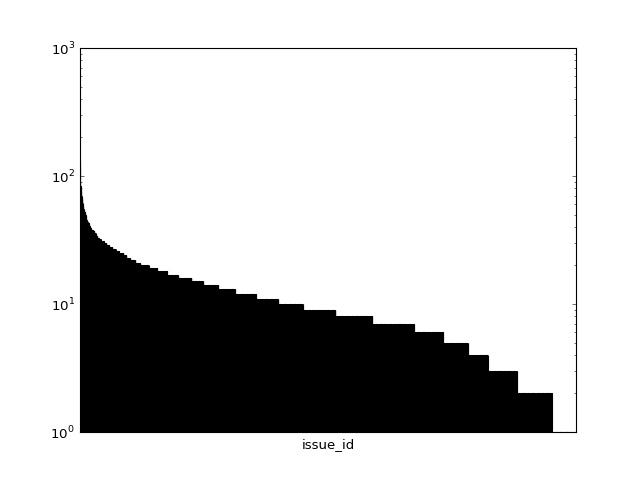

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
event_counts.plot(kind='bar', ax = ax)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yscale('log')

# Taking a closer look at issues

<IPython.core.display.Javascript object>


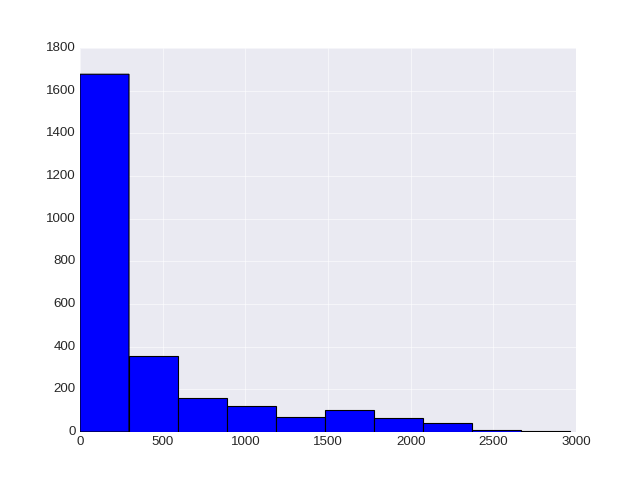

In [19]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False).dt.days.hist()

In [40]:
cmap = {'Trivial':'green', 'Minor':'yellow', 'Major':'orange', 'Critical':'red', 'Blocker':'grey', 'nan':'white'}


<IPython.core.display.Javascript object>


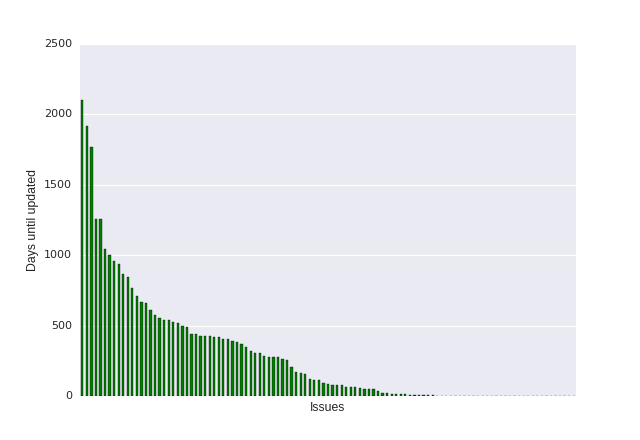

In [101]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False)[issues.priority=='Trivial'].dt.days.plot(kind='bar', color = 'green')#, color=[cmap(x) for x in issues.priority] )
plt.xticks([])
plt.ylabel('Days until updated')
plt.xlabel('Issues')

<IPython.core.display.Javascript object>


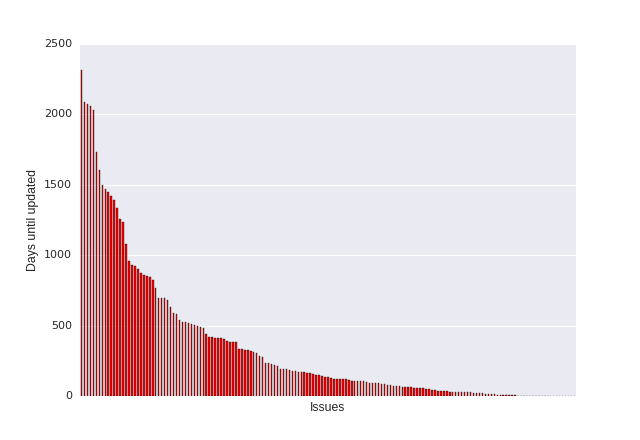

In [102]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False)[issues.priority=='Critical'].dt.days.plot(kind='bar', color = 'red')#, color=[cmap(x) for x in issues.priority] )
plt.xticks([])
plt.ylabel('Days until updated')
plt.xlabel('Issues')

<IPython.core.display.Javascript object>


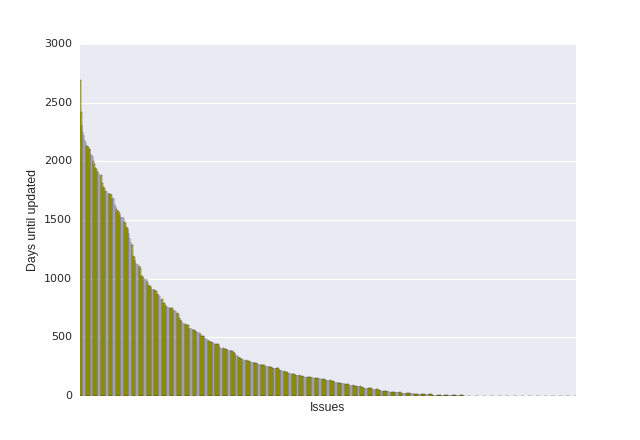

In [103]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False)[issues.priority=='Minor'].dt.days.plot(kind='bar', color = 'yellow')#, color=[cmap(x) for x in issues.priority] )
plt.xticks([])
plt.ylabel('Days until updated')
plt.xlabel('Issues')

<IPython.core.display.Javascript object>


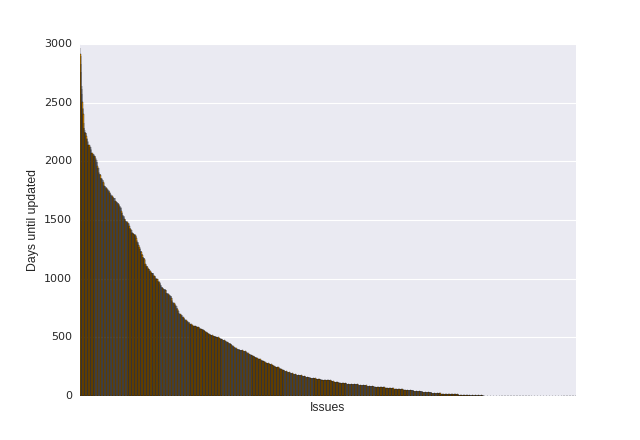

In [105]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False)[issues.priority=='Major'].dt.days.plot(kind='bar', color = 'orange')#, color=[cmap(x) for x in issues.priority] )
plt.xticks([])
plt.ylabel('Days until updated')
plt.xlabel('Issues')

## Distributions of Priorities

In [47]:
priority_frame = pd.DataFrame(columns = ['_id','priority','time'],data={'_id':issues._id, 'priority':issues.priority, 'time':issues.updated_at - issues.created_at})

In [48]:
priority_frame.fillna('nan',inplace=True)

<IPython.core.display.Javascript object>


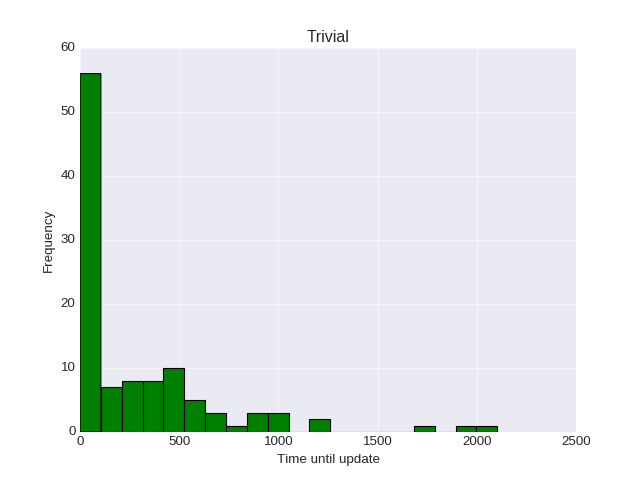

<IPython.core.display.Javascript object>


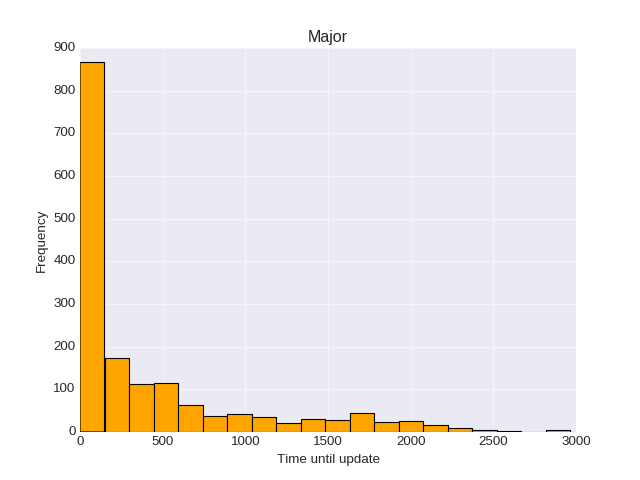

<IPython.core.display.Javascript object>


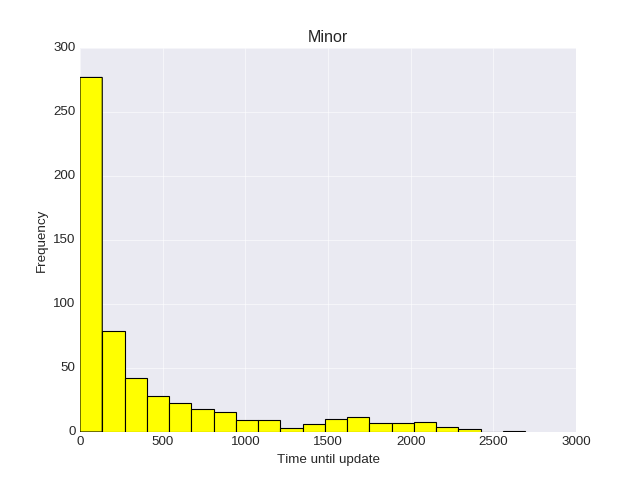

<IPython.core.display.Javascript object>


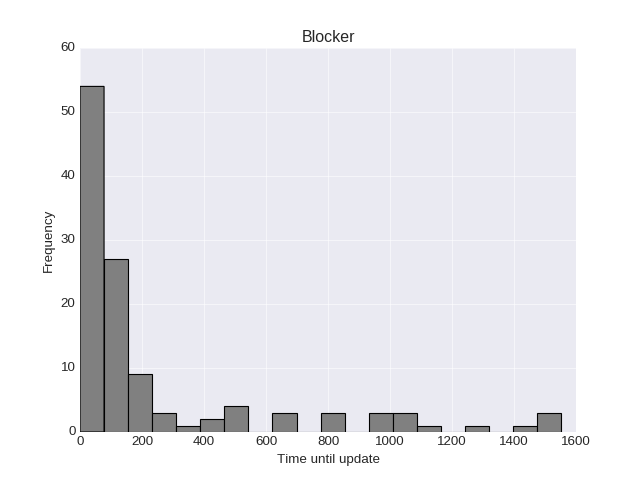

<IPython.core.display.Javascript object>


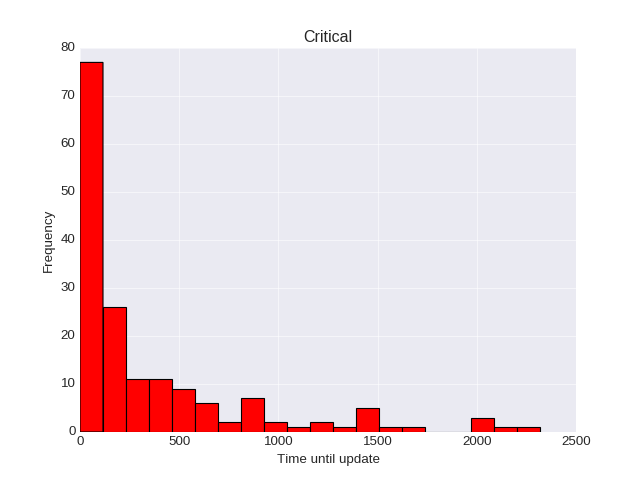

<IPython.core.display.Javascript object>


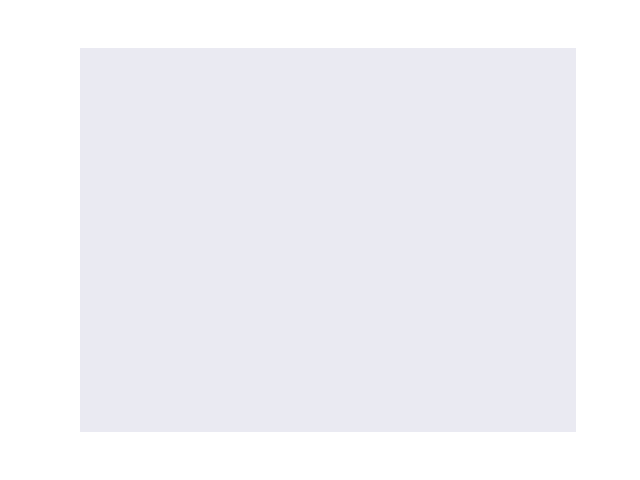

In [49]:
plt.close('all')
for p in priority_frame.priority.unique():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    priority_frame.time[priority_frame.priority==p].dt.days.hist(bins=20,ax=ax, color=cmap[p])
    ax.set_title(p)
    ax.set_xlabel('Time until update')
    ax.set_ylabel('Frequency')
    

## How many events given a priority?

In [61]:
event_prios = { p:events.loc[events.issue_id.isin(priority_frame._id[priority_frame.priority == p])] for p in priority_frame.priority.unique() }

<IPython.core.display.Javascript object>


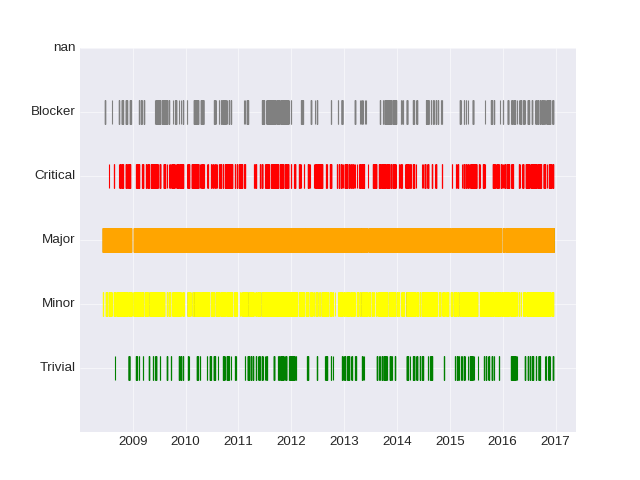

In [99]:
plt.close('all')
event_prios['Trivial']
ymap = {'Trivial':1, 'Minor':2, 'Major':3, 'Critical':4, 'Blocker':5, 'nan':7}
fig = plt.figure()
ax = fig.add_subplot(111)
    
for i,p in enumerate(priority_frame.priority.unique()):

    x = np.array(event_prios[p].created_at)
    y = ymap[p]*np.ones(len(x))
    ax.scatter(x,y, marker='|', color=cmap[p], s=500)
    ax.set_yticklabels(['','Trivial', 'Minor','Major','Critical','Blocker','nan'])
    

## Looking at Blocker Issues

**Intermediate Goal:** Find the frequency of events, as a function of distance from creation time

In [98]:
blockers = issues[issues.priority == 'Blocker']

In [130]:
blocker_events = pd.DataFrame(columns = blockers._id, data={
                                                            i:(events.created_at[events.issue_id == i] - blockers.created_at[blockers._id==i].iloc[0]) 
                                                            for i in blockers._id
                                                            })
#for i in blockers._id:
    

In [143]:
tmp = blocker_events[blocker_events.columns[0]].iloc[0]

In [159]:
tmp.days

46

<IPython.core.display.Javascript object>


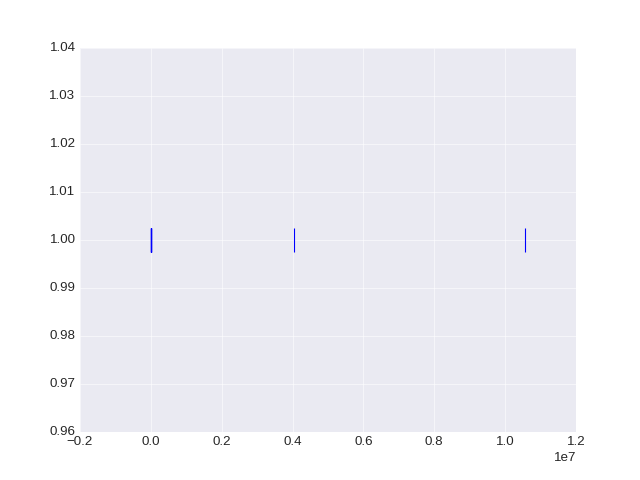

In [163]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
for i in blocker_events.columns[:1]:
    xd = np.array(blocker_events[i].dt.days)
    xs = np.array(blocker_events[i].dt.seconds)
    
    y = np.ones_like(x)
    ax.scatter(xs+xd*86400,y, marker='|', s=500)

In [169]:
seconds_passed = np.array([ np.array(blocker_events[i].dt.days.iloc[j])*86400 + np.array(blocker_events[i].dt.seconds.iloc[j])for j in range(len(blocker_events[i])) for i in blocker_events.columns[:]])

KeyboardInterrupt: 

In [177]:
seconds_passed = pd.concat([blocker_events[i].dropna() for i in blocker_events.columns], axis=0)

<IPython.core.display.Javascript object>


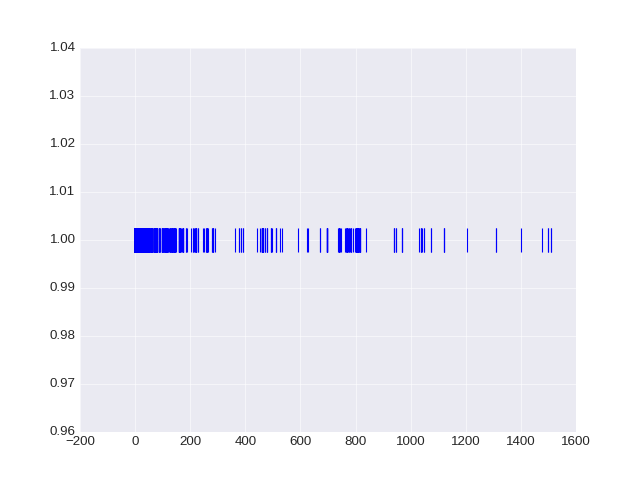

In [188]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(seconds_passed.dt.days, np.ones(len(seconds_passed)), marker='|', s=500)

<IPython.core.display.Javascript object>


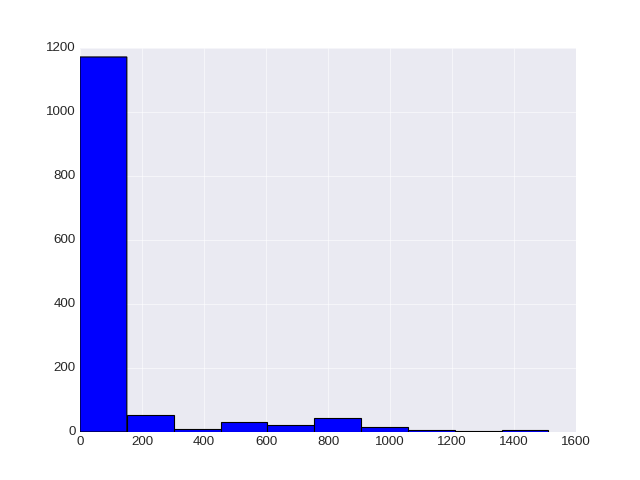

In [192]:
plt.close('all')
seconds_passed.dt.days.hist()

In [190]:
first_day = seconds_passed[seconds_passed.dt.days==1]

<IPython.core.display.Javascript object>


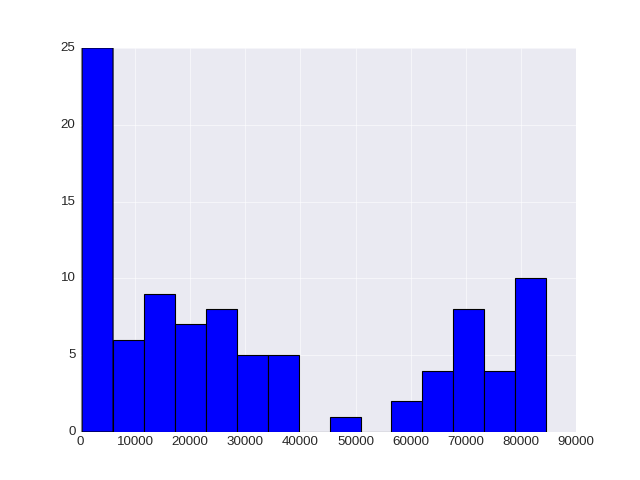

In [195]:
plt.close('all')
first_day.dt.seconds.hist(bins=15)